http://stackoverflow.com/questions/38728366/pandas-cannot-load-data-csv-encoding-mystery

It seems that there's something very wrong with the input file. There are encoding errors throughout.

One thing you could do, is to read the CSV file as a binary, decode the binary string and replace the erroneous characters.


In [137]:

in_filename = '/Users/chengjun/github/cjc/data/try.txt'
out_filename = '/Users/chengjun/github/cjc/data/try4.txt'

from functools import partial
# chunksize = 100*1024*1024 # read 100MB at a time

# Decode with UTF-8 and replace errors with "?"
with open(in_filename, 'rb') as in_file:
    with open(out_filename, 'w') as out_file:
        # for byte_fragment in iter(partial(in_file.read, chunksize), b''):
        for byte_fragment in iter(partial(in_file.read), b''):
            byte_file = byte_fragment.decode(encoding='gb18030', errors='replace')
            out_file.write(byte_file.encode('utf8'))

# Now read the repaired file into a dataframe
import pandas as pd
df = pd.read_csv(out_filename, sep = ';')
df.head()

,公众号昵称,微信号,公众号类别,作者,发布位置,是否原创,标题,文章链接,摘要,正文,...,更新时间,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,中国政府网,zhengfu,政务,NaN,0,0,李克强“盯”住农民工欠薪：决不能让他们背井离乡流汗再流泪,http://mp.weixin.qq.com/s?__biz=MzA4MDA0MzcwMA...,“农民工在外打工非常不易，决不能让他们背井离乡流汗再流泪！”李克强斩钉截铁地说。,丨来源：新京报新媒体鲁甸地震受灾群众甘永荣的一句话，让李克强总理的表情立刻凝重起来。“你打工...,...,2017-01-27 11:32:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,中国政府网,zhengfu,政务,NaN,0,0,总理对话农民工，问过哪些问题？,http://mp.weixin.qq.com/s?__biz=MzA4MDA0MzcwMA...,总理考察活动时和农民工聊过什么话题？说过哪些话？中国政府网为你一一梳理。,总理考察活动时和农民工聊过什么话题？说过哪些话？中国政府网为你一一梳理。 总理和农民工聊过这...,...,2017-02-02 11:32:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,中国政府网,zhengfu,政务,NaN,0,0,云南考察 | 李克强：农民工欠薪问题必须反复抓、抓到底,http://mp.weixin.qq.com/s?__biz=MzA4MDA0MzcwMA...,李克强23日考察灾后重建的云南鲁甸，再三问询围拢人群，有没有没领到工资的农民工？现场陆续有人...,李克强春节前重回鲁甸李克强23日重回云南鲁甸考察灾后重建。看到这里焕然一新的面貌，总理说，你...,...,2017-01-26 13:16:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,中国政府网,zhengfu,政务,NaN,0,0,李克强：决不能让农民工的辛勤付出得不到回报,http://mp.weixin.qq.com/s?__biz=MzA4MDA0MzcwMA...,李克强：决不能让农民工的辛勤付出得不到回报,2月3日，春节后的首个工作日，国务院召开常务会议，其中议题之一便是部署建立解决农民工工资拖欠...,...,2017-02-07 11:38:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,中国政府网,zhengfu,政务,NaN,0,0,48小时!总理帮震区农民工“讨”回欠薪,http://mp.weixin.qq.com/s?__biz=MzA4MDA0MzcwMA...,48小时！总理帮震区农民工“讨”回欠薪,丨来源：新京报新媒体1月25日早上8点半，甘永荣的银行卡里打进来5.8万元。这是李克强总理帮...,...,2017-01-29 11:57:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
df.shape

(1231, 28)

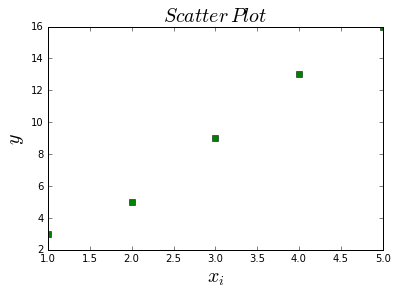

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt

xi = [1, 2, 3, 4, 5]
y = [3, 5, 9, 13, 16]

plt.plot(xi, y, 'gs')
plt.xlabel('$x_i$', fontsize = 20)
plt.ylabel('$y$', fontsize = 20)
plt.title('$Scatter\,Plot$', fontsize = 20)
plt.show()